14156 0


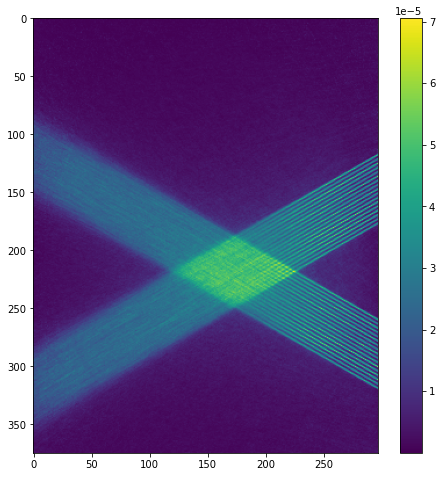

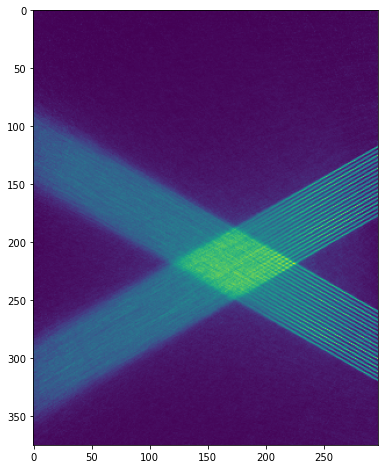

In [90]:
import pydicom
from pydicom.data import get_testdata_file
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy

source1=np.zeros((379,375,297))
source2=np.zeros((379,375,297))
for i in np.arange(1,6):
    ds = pydicom.dcmread("d:/Desktop/SFRT-Topas/vhee/vhee_patient/2source_250MV/results/dosetomedium_vhee_2source_250MV_source1__"+str(i)+".dcm")
    source1+=ds.pixel_array*ds.DoseGridScaling
for i in np.arange(1,6):
    ds = pydicom.dcmread("d:/Desktop/SFRT-Topas/vhee/vhee_patient/2source_250MV/results/dosetomedium_vhee_2source_250MV_source2__"+str(i)+".dcm")
    source2+=ds.pixel_array*ds.DoseGridScaling
tot_dcm=source1+source2
figure(1,figsize=(8,8))
plt.imshow(tot_dcm[190])
plt.colorbar()

tot_dcm=np.around(tot_dcm*1e8)
tot_dcm=tot_dcm.astype(np.uint16)
print(tot_dcm.max(),tot_dcm.min())
ds.PixelData = tot_dcm.tobytes()
ds[0x0020, 0x0032].value= [163.5935,155.156,-811.09]
ds.PatientName = '250 MV 2 source 5M hist each'
ds.save_as("d:/Desktop/SFRT-Topas/vhee/vhee_patient/2source_250MV/results/dosetomedium_vhee_2source_250MV_tot.dcm")
new_ds= pydicom.dcmread("d:/Desktop/SFRT-Topas/vhee/vhee_patient/2source_250MV/results/dosetomedium_vhee_2source_250MV_tot.dcm")

figure(2,figsize=(8,8))
plt.imshow(tot_dcm[190])